# Day 3: Advanced Data Cleaning & Preparation

## 1. Introduction to Data Cleaning
- Why real-world data is messy
- What makes data ML-ready
- Overview of the Day 3 workflow


In [19]:
# Importing Lib
import pandas as pd 
import numpy as np


In [20]:
# Loading The Data
ds=pd.read_csv(r"data/dataset_1.csv")

## A. How does the data look?

In [21]:
ds.head()

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,Unnamed: 8,Unnamed: 9
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True,NaN,NaN
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False,NaN,NaN
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True,NaN,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True,NaN,NaN
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True,NaN,NaN


In [22]:
ds.tail()

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,Unnamed: 8,Unnamed: 9
16,1017,Michael,Scott,123/643/9775,"121 Paper Avenue, Pennsylvania",Yes,No,False,NaN,NaN
17,1018,Clark,Kent,7066950392,3498 Super Lane,Y,NaN,True,NaN,NaN
18,1019,Creed,Braton,N/a,N/a,N/a,Yes,True,NaN,NaN
19,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,N,True,NaN,NaN
20,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,N,True,NaN,NaN


In [23]:
ds.sample(10, random_state=42)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,Unnamed: 8,Unnamed: 9
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True,NaN,NaN
17,1018,Clark,Kent,7066950392,3498 Super Lane,Y,NaN,True,NaN,NaN
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,N,False,NaN,NaN
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False,NaN,NaN
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False,NaN,NaN
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True,NaN,NaN
11,1012,Harry,...Potter,7066950392,2394 Hogwarts Avenue,Y,NaN,True,NaN,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True,NaN,NaN
18,1019,Creed,Braton,N/a,N/a,N/a,Yes,True,NaN,NaN
16,1017,Michael,Scott,123/643/9775,"121 Paper Avenue, Pennsylvania",Yes,No,False,NaN,NaN


## B. How big is the data?

In [24]:
ds.shape

(21, 10)

In [25]:
ds.size

210

In [26]:
ds.ndim

2

In [27]:
type(ds)

pandas.core.frame.DataFrame

In [28]:
ds.describe()

,CustomerID,Unnamed: 8,Unnamed: 9
count,21.000000,0.0,0.0
mean,1010.952381,NaN,NaN
std,6.127611,NaN,NaN
min,1001.000000,NaN,NaN
25%,1006.000000,NaN,NaN
50%,1011.000000,NaN,NaN
75%,1016.000000,NaN,NaN
max,1020.000000,NaN,NaN


### C. what is the data type of cols

In [29]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         21 non-null     int64  
 1   First_Name         21 non-null     object 
 2   Last_Name          20 non-null     object 
 3   Phone_Number       19 non-null     object 
 4   Address            21 non-null     object 
 5   Paying Customer    21 non-null     object 
 6   Do_Not_Contact     17 non-null     object 
 7   Not_Useful_Column  21 non-null     bool   
 8   Unnamed: 8         0 non-null      float64
 9   Unnamed: 9         0 non-null      float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 1.6+ KB


### D. How does the Data look Mathematically

In [30]:
ds.describe()

,CustomerID,Unnamed: 8,Unnamed: 9
count,21.000000,0.0,0.0
mean,1010.952381,NaN,NaN
std,6.127611,NaN,NaN
min,1001.000000,NaN,NaN
25%,1006.000000,NaN,NaN
50%,1011.000000,NaN,NaN
75%,1016.000000,NaN,NaN
max,1020.000000,NaN,NaN


### E. Are there any  duplicate data?

In [31]:
ds.duplicated().sum()

np.int64(1)

In [32]:
ds.drop_duplicates()

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,Unnamed: 8,Unnamed: 9
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True,NaN,NaN
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False,NaN,NaN
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True,NaN,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True,NaN,NaN
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True,NaN,NaN
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True,NaN,NaN
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False,NaN,NaN
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False,NaN,NaN
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False,NaN,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True,NaN,NaN


## 2. Handling Mising Values(Advanced Techniques)


### Identifying Mising data
- `isna()`, `isnull()`, `notna()`
- missing value visualization

### F. Are there any missing values?

In [33]:
ds.isnull().sum()

CustomerID            0
First_Name            0
Last_Name             1
Phone_Number          2
Address               0
Paying Customer       0
Do_Not_Contact        4
Not_Useful_Column     0
Unnamed: 8           21
Unnamed: 9           21
dtype: int64

In [34]:
ds.count()

CustomerID           21
First_Name           21
Last_Name            20
Phone_Number         19
Address              21
Paying Customer      21
Do_Not_Contact       17
Not_Useful_Column    21
Unnamed: 8            0
Unnamed: 9            0
dtype: int64

In [35]:
# percentage of null value in the data
(ds.isnull().sum() / len(ds)) * 100

CustomerID             0.000000
First_Name             0.000000
Last_Name              4.761905
Phone_Number           9.523810
Address                0.000000
Paying Customer        0.000000
Do_Not_Contact        19.047619
Not_Useful_Column      0.000000
Unnamed: 8           100.000000
Unnamed: 9           100.000000
dtype: float64

<Axes: >

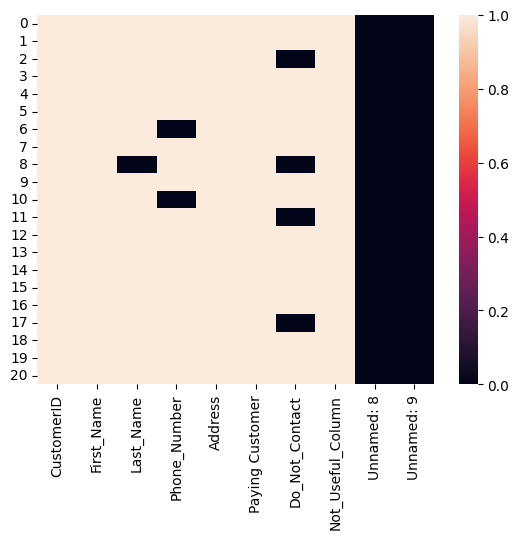

In [36]:
# Visual Check
import seaborn as sns
sns.heatmap(ds.notnull())

### Deleting Missing Data
- `dropna()` (row-wise / column-wise)
- When deletion is acceptable vs risky


In [37]:
ds.dropna()

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column,Unnamed: 8,Unnamed: 9


In [38]:
ds.dropna(axis=1, how="any")

,CustomerID,First_Name,Address,Paying Customer,Not_Useful_Column
0,1001,Frodo,"123 Shire Lane, Shire",Yes,True
1,1002,Abed,93 West Main Street,No,False
2,1003,Walter,298 Drugs Driveway,N,True
3,1004,Dwight,"980 Paper Avenue, Pennsylvania, 18503",Yes,True
4,1005,Jon,123 Dragons Road,Y,True
5,1006,Ron,768 City Parkway,Yes,True
6,1007,Jeff,1209 South Street,No,False
7,1008,Sherlock,98 Clue Drive,N,False
8,1009,Gandalf,123 Middle Earth,Yes,False
9,1010,Peter,"25th Main Street, New York",Yes,True


In [39]:
ds["Paying Customer"].unique()

array(['Yes', 'No', 'N', 'Y', 'N/a'], dtype=object)

In [40]:
ds.dropna(axis=1, how="all", inplace=True)

In [41]:
ds

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [42]:
ds.drop(ds[(ds["Phone_Number"].isnull())|(ds["Phone_Number"]=="N/a")].index, inplace=True)

In [43]:
ds["Do_Not_Contact"] = ds["Do_Not_Contact"].fillna("Yes")
# ds.fillna({"Do_Not_Contact": "Yes"}, inplace=True)


In [44]:
ds.replace({"Y":"Yes", "N":"No"}, inplace=True)

In [45]:
ds.drop("Not_Useful_Column", axis=1, inplace=True)

In [46]:
for index in ds.index:
    if ds.loc[index, "Do_Not_Contact"]=="Yes":
        ds.drop(index, inplace=True)
ds

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Yes,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,No,No
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,No
13,1014,Leslie,Knope,876|678|3469,343 City Parkway,Yes,No
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,No,No
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,No
16,1017,Michael,Scott,123/643/9775,"121 Paper Avenue, Pennsylvania",Yes,No
19,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,No


In [47]:
ds.drop(ds[ds["Do_Not_Contact"]=="Yes"].index)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Yes,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,No,No
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,No
13,1014,Leslie,Knope,876|678|3469,343 City Parkway,Yes,No
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,No,No
15,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,No
16,1017,Michael,Scott,123/643/9775,"121 Paper Avenue, Pennsylvania",Yes,No
19,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,No


In [48]:
ds.reset_index(drop=True)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1005,Jon,Snow,876|678|3469,123 Dragons Road,Yes,No
2,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,No,No
3,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No
4,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,No
5,1014,Leslie,Knope,876|678|3469,343 City Parkway,Yes,No
6,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,No,No
7,1016,Ron,Weasley,123-545-5421,2395 Hogwarts Avenue,No,No
8,1017,Michael,Scott,123/643/9775,"121 Paper Avenue, Pennsylvania",Yes,No
9,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,No


### Imputation Techniques (ML-Focused)


### Numerical Imputation
- Mean, median, mode imputation (SimpleImputer)
- Constant-value imputation (Doesnot alter the existing data)
- KNN Imputation (KNNImputer)
- Iterative multivariate imputation (IterativeImputer)


In [49]:
"""
Use SimpleImputer if
- Missing value < 5%
- MCAR[Missing Completely At Random]
"""
tt=pd.read_csv(r"data/titanic_toy.csv")
tt.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [50]:
tt.shape

(891, 4)

In [51]:
tt.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [52]:
tt.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [53]:
age_mean=tt['Age'].mean()
age_median=tt['Age'].median()
age_mode=tt['Age'].mode()

fare_mean=tt["Fare"].mean()
fare_median=tt["Fare"].median()
fare_mode=tt["Fare"].mode()


In [54]:
df_tt=tt.copy()

In [55]:
df_tt["Age_mean"]=df_tt["Age"].fillna(age_mean)
df_tt["Age_median"]=df_tt["Age"].fillna(age_median)
df_tt["Age_mode"]=df_tt["Age"].fillna(age_mode[0])

df_tt["Fare_mean"]=df_tt["Fare"].fillna(fare_mean)
df_tt["Fare_median"]=df_tt["Fare"].fillna(fare_median)
df_tt["Fare_mode"]=df_tt["Fare"].fillna(fare_mode[0])

In [56]:
df_tt.sample(10)

,Age,Fare,Family,Survived,Age_mean,Age_median,Age_mode,Fare_mean,Fare_median,Fare_mode
344,36.0,13.0000,0,0,36.000000,36.0,36.0,13.000000,13.0000,13.0000
253,30.0,16.1000,1,0,30.000000,30.0,30.0,16.100000,16.1000,16.1000
262,52.0,79.6500,2,0,52.000000,52.0,52.0,79.650000,79.6500,79.6500
860,41.0,NaN,2,0,41.000000,41.0,41.0,32.279338,14.4542,8.0500
141,22.0,7.7500,0,1,22.000000,22.0,22.0,7.750000,7.7500,7.7500
183,1.0,39.0000,3,1,1.000000,1.0,1.0,39.000000,39.0000,39.0000
470,NaN,7.2500,0,0,29.699118,28.0,24.0,7.250000,7.2500,7.2500
713,29.0,9.4833,0,0,29.000000,29.0,29.0,9.483300,9.4833,9.4833
494,21.0,8.0500,0,0,21.000000,21.0,21.0,8.050000,8.0500,8.0500
203,45.5,7.2250,0,0,45.500000,45.5,45.5,7.225000,7.2250,7.2250


In [57]:
# Calculate variances for original Age and Fare (ignoring NaNs)
original_age_var = tt["Age"].var(skipna=True)
original_fare_var = tt["Fare"].var(skipna=True)

# Calculate variances for imputed columns
age_mean_var = df_tt["Age_mean"].var()
age_median_var = df_tt["Age_median"].var()
age_mode_var = df_tt["Age_mode"].var()

fare_mean_var = df_tt["Fare_mean"].var()
fare_median_var = df_tt["Fare_median"].var()
fare_mode_var = df_tt["Fare_mode"].var()

# Print the variances
print(f"Original Age Variance: {original_age_var}")
print(f"Age Mean Imputed Variance: {age_mean_var}")
print(f"Age Median Imputed Variance: {age_median_var}")
print(f"Age Mode Imputed Variance: {age_mode_var}")
print("-"*50)
print(f"Original Fare Variance: {original_fare_var}")
print(f"Fare Mean Imputed Variance: {fare_mean_var}")
print(f"Fare Median Imputed Variance: {fare_median_var}")
print(f"Fare Mode Imputed Variance: {fare_mode_var}")

Original Age Variance: 211.01912474630802
Age Mean Imputed Variance: 169.0523999372108
Age Median Imputed Variance: 169.51249827942345
Age Mode Imputed Variance: 174.22869485188968
--------------------------------------------------
Original Fare Variance: 2530.6730768999514
Fare Mean Imputed Variance: 2402.717696607258
Fare Median Imputed Variance: 2417.971599672527
Fare Mode Imputed Variance: 2430.9014138846615


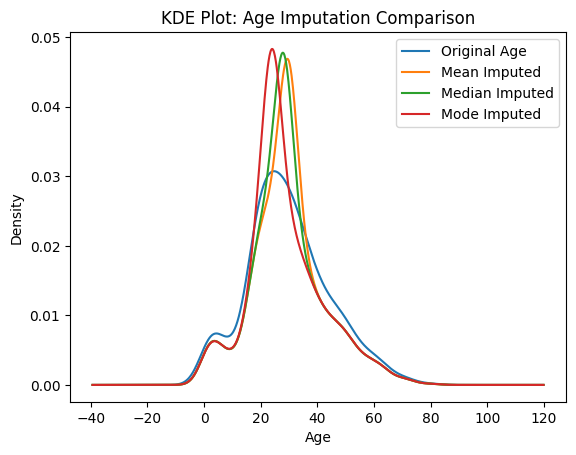

In [58]:
import matplotlib.pyplot as plt

tt["Age"].plot(kind="kde", label="Original Age")
df_tt["Age_mean"].plot(kind="kde", label="Mean Imputed")
df_tt["Age_median"].plot(kind="kde", label="Median Imputed")
df_tt["Age_mode"].plot(kind="kde", label="Mode Imputed")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot: Age Imputation Comparison")
plt.show()


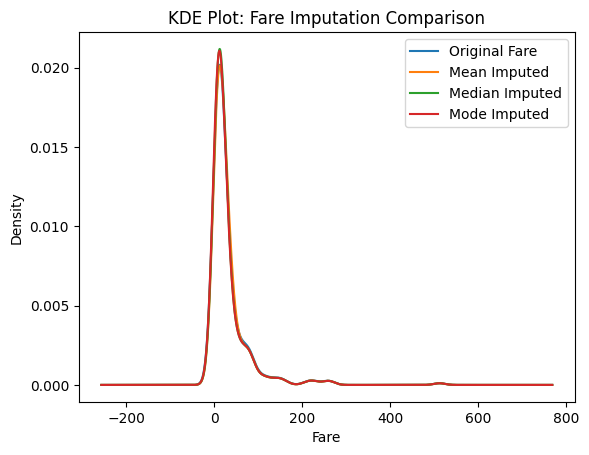

In [59]:
tt["Fare"].plot(kind="kde", label="Original Fare")
df_tt["Fare_mean"].plot(kind="kde", label="Mean Imputed")
df_tt["Fare_median"].plot(kind="kde", label="Median Imputed")
df_tt["Fare_mode"].plot(kind="kde", label="Mode Imputed")

plt.legend()
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("KDE Plot: Fare Imputation Comparison")
plt.show()


<Axes: >

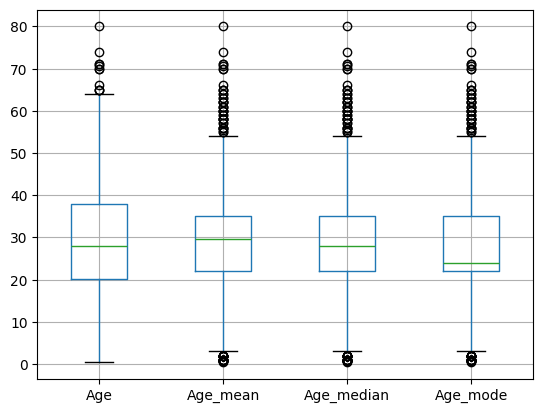

In [60]:
df_tt[["Age", "Age_mean", "Age_median", "Age_mode"]].boxplot()

<Axes: >

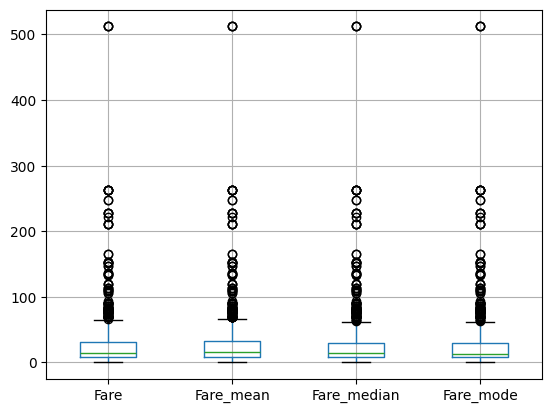

In [61]:
df_tt[["Fare","Fare_mean", "Fare_median", "Fare_mode"]].boxplot()

### Categorical Imputation
- Most frequent value
- “Unknown” category
- Predictive imputation using a model


In [62]:
"""
MCAR
Missing value < 5%
use the most frequent value
"""
dt= pd.read_csv(r"data/train.csv")
dt=dt[["GarageQual", "FireplaceQu", "SalePrice"]]

In [63]:
dt.sample(10)

,GarageQual,FireplaceQu,SalePrice
88,NaN,NaN,85000
1300,TA,TA,225000
534,TA,Gd,178000
523,TA,Gd,184750
690,TA,TA,141000
681,TA,NaN,159434
1170,TA,Po,171000
280,TA,TA,228500
1443,Fa,Gd,121000
210,NaN,NaN,98000


In [64]:
dt.shape

(1460, 3)

In [65]:
dt.isnull().mean()

GarageQual     0.055479
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [66]:
dt["GarageQual"].isnull().sum()

np.int64(81)

Text(0, 0.5, 'Number of Houses')

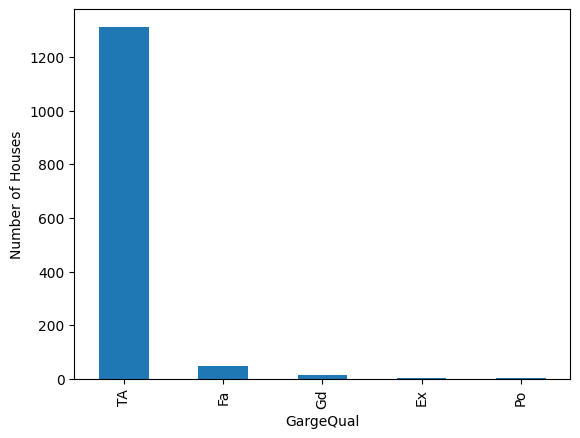

In [67]:
dt["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GargeQual")
plt.ylabel("Number of Houses")

In [68]:
dt["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

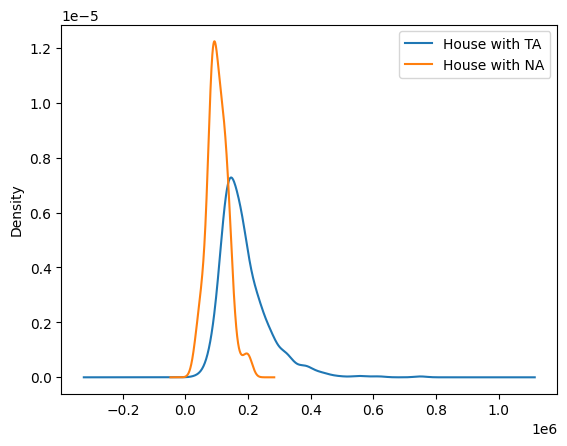

In [69]:
dt[dt['GarageQual']=='TA']['SalePrice'].plot(kind="kde", label="House with TA")
dt[dt['GarageQual'].isnull()]['SalePrice'].plot(kind="kde", label="House with NA")
plt.legend()

In [70]:
temp=dt[dt['GarageQual']=='TA']['SalePrice']
dt["GarageQual"]=dt["GarageQual"].fillna('TA')

Text(0, 0.5, 'Number of Houses')

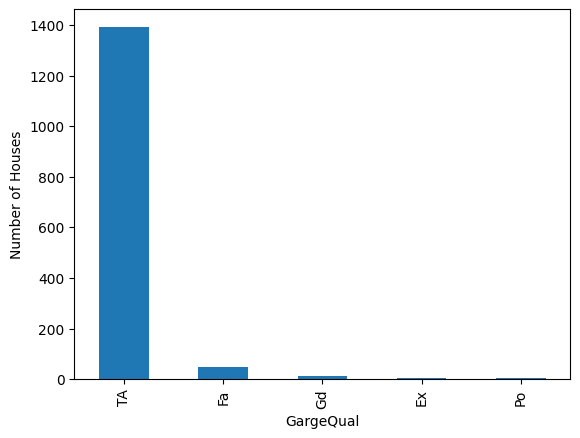

In [71]:
dt["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GargeQual")
plt.ylabel("Number of Houses")

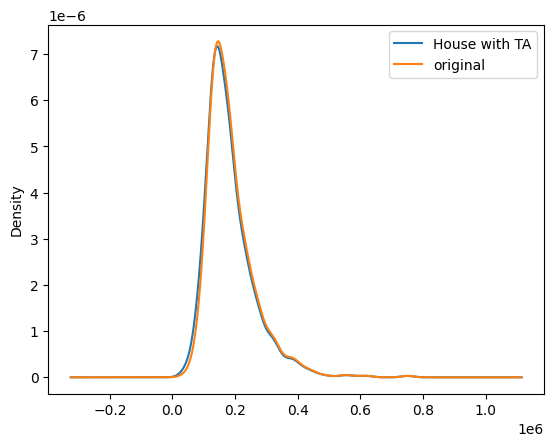

In [72]:
dt[dt['GarageQual']=='TA']['SalePrice'].plot(kind="kde", label="House with TA")
temp.plot(kind='kde', label='original')
plt.legend()

In [73]:
dt["FireplaceQu"].isnull().sum()

np.int64(690)

<Axes: xlabel='FireplaceQu'>

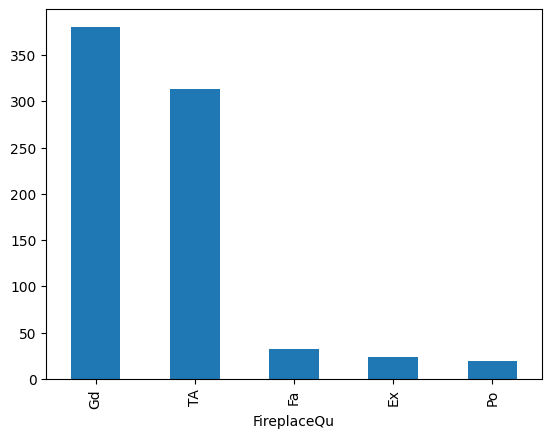

In [74]:
dt["FireplaceQu"].value_counts().sort_values(ascending=False).plot.bar()

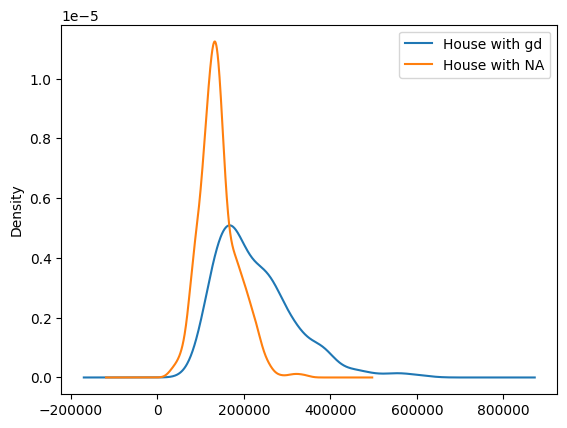

In [75]:
dt[dt['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde", label="House with gd")
dt[dt['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", label="House with NA")
plt.legend()

In [76]:
temp=dt[dt['FireplaceQu']=='Gd']['SalePrice']
dt["FireplaceQu"]=dt["FireplaceQu"].fillna('Gd')

<Axes: xlabel='FireplaceQu'>

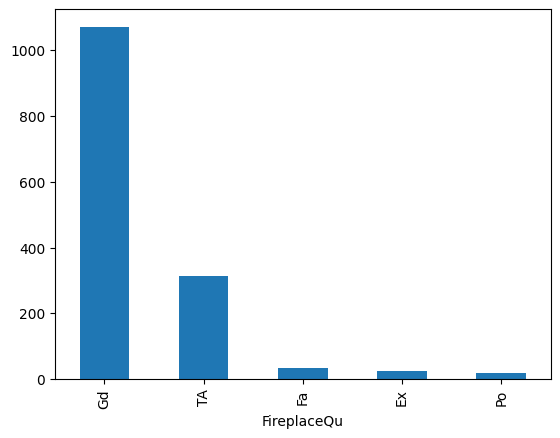

In [77]:
dt["FireplaceQu"].value_counts().sort_values(ascending=False).plot.bar()

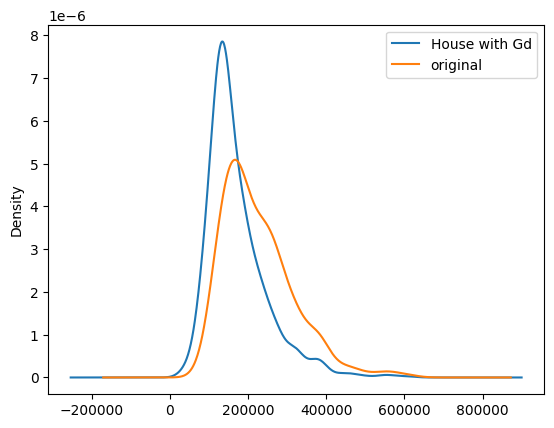

In [78]:
dt[dt['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde", label="House with Gd")
temp.plot(kind='kde', label='original')
plt.legend()

In [79]:
tt=pd.read_csv(r"data/titanic_toy.csv")
tt.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [80]:
tt["Imputed_Age"]=tt["Age"]
# Number of missing Age values
n_missing = tt["Age"].isnull().sum()

# Randomly sample non-null Age values
sampled_ages = tt["Age"].dropna().sample(n_missing).values

# Assign using .loc
tt.loc[tt["Age"].isnull(), "Imputed_Age"] = sampled_ages


In [81]:
tt

,Age,Fare,Family,Survived,Imputed_Age
0,22.0,7.2500,1,0,22.0
1,38.0,71.2833,1,1,38.0
2,26.0,7.9250,0,1,26.0
3,35.0,53.1000,1,1,35.0
4,35.0,8.0500,0,0,35.0
...,...,...,...,...,...
886,27.0,13.0000,0,0,27.0
887,19.0,30.0000,0,1,19.0
888,NaN,23.4500,3,0,26.0
889,26.0,NaN,0,1,26.0


### KNN Imputer

In [82]:
from sklearn.impute import KNNImputer

tt=pd.read_csv(r"data/titanic_toy.csv")
tt.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [83]:
tt.sample(10, random_state=42)

,Age,Fare,Family,Survived
709,NaN,15.2458,2,1
439,31.0,10.5000,0,0
840,20.0,7.9250,0,0
720,6.0,33.0000,1,1
39,14.0,11.2417,1,1
290,26.0,78.8500,0,1
300,NaN,7.7500,0,1
333,16.0,18.0000,2,0
208,16.0,7.7500,0,1
136,19.0,26.2833,2,1


In [84]:
imputer= KNNImputer(n_neighbors=3)
tt_imputed=imputer.fit_transform(tt)
tt=pd.DataFrame(tt_imputed, columns=tt.columns)

In [85]:
tt.loc[300]

Age         35.666667
Fare         7.750000
Family       0.000000
Survived     1.000000
Name: 300, dtype: float64

In [86]:
tt["Age"].apply(np.floor).sample(10)

14     14.0
200    28.0
385    18.0
870    26.0
770    24.0
139    24.0
273    37.0
179    36.0
493    71.0
118    24.0
Name: Age, dtype: float64

### Iterative Imputer/MICE(Multivariate Imputation by Chained Equation)
- MAR
- Accurate
- Computationally expensive

#### Steps:
- fill by mean
- predict the value of a column through other columns and do it for each column
- subtract the original data and the new predicted
- and again repeat step 2 and 3 until the diff at the nan is 0 or until a certain iteration

### Time-series Imputation
- Forward fill (ffill)
- Backward fill (bfill)
- Linear interpolation


## 3. Fixing Incorrect Data Types (Advanced)
- Converting strings to numeric using `pd.to_numeric(errors="coerce")`
- Converting strings to dates (to_datetime)
- Detecting mixed-type columns
- Using regex-based cleanup before conversion
- Identifying out-of-range or corrupted values


## Mixed Data

In [87]:
mx=pd.read_csv("data/mixed.csv")
mx.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [88]:
mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cabin     204 non-null    object
 1   Ticket    891 non-null    object
 2   number    891 non-null    object
 3   Survived  891 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


In [89]:
mx["number_numerical"]=pd.to_numeric(mx["number"], errors="coerce", downcast='integer')

In [90]:
mx.head()

,Cabin,Ticket,number,Survived,number_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN


In [91]:
mx["number_categorical"]=np.where(mx["number_numerical"].isnull(), mx["number"], np.nan)
mx.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [92]:
mx["cabin_num"]=mx["Cabin"].str.extract('(\d)')
mx["cabin_cat"]=mx["Cabin"].str[0]

In [93]:
mx.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,8,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,1,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [94]:
mx["Ticket_num"]=mx["Ticket"].apply(lambda s: s.split()[-1])
mx["Ticket_num"]=pd.to_numeric(mx["Ticket_num"], errors="coerce", downcast="integer")

mx["Ticket_cat"]=mx["Ticket"].apply(lambda s: s.split()[0])
mx["Ticket_cat"]=np.where(mx["Ticket_cat"].str.isdigit(), np.nan, mx["Ticket_cat"])

In [95]:
mx.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,8,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,1,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


In [96]:
# Datetime
date=pd.read_csv("data/orders.csv")
time=pd.read_csv("data/messages.csv")


In [97]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [98]:
time.head()


,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [99]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [100]:
# converting to datatime
date["date"]=pd.to_datetime(date["date"])
time["date"]=pd.to_datetime(time["date"])

In [101]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [102]:
date["date"].dt.day
# year month day

0      10
1      15
2      23
3      17
4       6
       ..
995     8
996     6
997     7
998     3
999    15
Name: date, Length: 1000, dtype: int32

In [103]:
date["month"]=date["date"].dt.month_name()
date["month"]

0      December
1        August
2       October
3        August
4       January
         ...   
995     October
996    December
997         May
998       March
999     October
Name: month, Length: 1000, dtype: object

In [104]:
date["year"]=date["date"].dt.year
date.head()

,date,product_id,city_id,orders,month,year
0,2019-12-10,5628,25,3,December,2019
1,2018-08-15,3646,14,157,August,2018
2,2018-10-23,1859,25,1,October,2018
3,2019-08-17,7292,25,1,August,2019
4,2019-01-06,4344,25,3,January,2019


In [105]:
date["dow"]=date["date"].dt.dayofweek
date.head()

,date,product_id,city_id,orders,month,year,dow
0,2019-12-10,5628,25,3,December,2019,1
1,2018-08-15,3646,14,157,August,2018,2
2,2018-10-23,1859,25,1,October,2018,1
3,2019-08-17,7292,25,1,August,2019,5
4,2019-01-06,4344,25,3,January,2019,6


In [106]:
date["day"]=date["date"].dt.day_name()
date.head()

,date,product_id,city_id,orders,month,year,dow,day
0,2019-12-10,5628,25,3,December,2019,1,Tuesday
1,2018-08-15,3646,14,157,August,2018,2,Wednesday
2,2018-10-23,1859,25,1,October,2018,1,Tuesday
3,2019-08-17,7292,25,1,August,2019,5,Saturday
4,2019-01-06,4344,25,3,January,2019,6,Sunday


In [107]:
date["quarter"]=date['date'].dt.quarter
date["semester"]=np.where(date["quarter"].isin([1,2]), 1,2)
date.head()

,date,product_id,city_id,orders,month,year,dow,day,quarter,semester
0,2019-12-10,5628,25,3,December,2019,1,Tuesday,4,2
1,2018-08-15,3646,14,157,August,2018,2,Wednesday,3,2
2,2018-10-23,1859,25,1,October,2018,1,Tuesday,4,2
3,2019-08-17,7292,25,1,August,2019,5,Saturday,3,2
4,2019-01-06,4344,25,3,January,2019,6,Sunday,1,1


In [108]:
time.head()


,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [109]:
time["hour"]=time["date"].dt.hour
time["min"]=time["date"].dt.minute
time.head()

,date,msg,hour,min
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11


In [110]:
time["date"].dt.time

0      00:50:00
1      23:40:00
2      00:21:00
3      00:31:00
4      23:11:00
         ...   
995    00:50:00
996    23:14:00
997    23:37:00
998    23:34:00
999    23:25:00
Name: date, Length: 1000, dtype: object

## 4. Text Data Cleaning (Beyond Basics)
- Lowercasing, strip spaces, remove special characters using regex
- Handling unicode, emojis, and symbols
- Splitting & extracting features using regex (str.extract, str.contains)


In [111]:
ds.sample(10)


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
16,1017,Michael,Scott,123/643/9775,"121 Paper Avenue, Pennsylvania",Yes,No
13,1014,Leslie,Knope,876|678|3469,343 City Parkway,Yes,No
19,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,No
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Yes,No
20,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,No
14,1015,Toby,Flenderson_,304-762-2467,214 HR Avenue,No,No
12,1013,Don,Draper,123-543-2345,2039 Main Street,Yes,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,No,No


In [112]:
ds["Last_Name"]=ds["Last_Name"].str.strip("_")

In [113]:
ds["Phone_Number"]=ds["Phone_Number"].str.replace("[\D]", "", regex=True)
ds.sample(10)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
20,1020,Anakin,Skywalker,8766783469,"910 Tatooine Road, Tatooine",Yes,No
16,1017,Michael,Scott,1236439775,"121 Paper Avenue, Pennsylvania",Yes,No
15,1016,Ron,Weasley,1235455421,2395 Hogwarts Avenue,No,No
9,1010,Peter,Parker,1235455421,"25th Main Street, New York",Yes,No
4,1005,Jon,Snow,8766783469,123 Dragons Road,Yes,No
19,1020,Anakin,Skywalker,8766783469,"910 Tatooine Road, Tatooine",Yes,No
0,1001,Frodo,Baggins,1235455421,"123 Shire Lane, Shire",Yes,No
13,1014,Leslie,Knope,8766783469,343 City Parkway,Yes,No
12,1013,Don,Draper,1235432345,2039 Main Street,Yes,No
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,No,No


In [114]:
ds["Address"]=ds["Address"].str.replace("[\d]", "", regex=True)
ds.sample(10)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
20,1020,Anakin,Skywalker,8766783469,"Tatooine Road, Tatooine",Yes,No
13,1014,Leslie,Knope,8766783469,City Parkway,Yes,No
16,1017,Michael,Scott,1236439775,"Paper Avenue, Pennsylvania",Yes,No
19,1020,Anakin,Skywalker,8766783469,"Tatooine Road, Tatooine",Yes,No
4,1005,Jon,Snow,8766783469,Dragons Road,Yes,No
9,1010,Peter,Parker,1235455421,"th Main Street, New York",Yes,No
15,1016,Ron,Weasley,1235455421,Hogwarts Avenue,No,No
12,1013,Don,Draper,1235432345,Main Street,Yes,No
14,1015,Toby,Flenderson,3047622467,HR Avenue,No,No
7,1008,Sherlock,Holmes,8766783469,Clue Drive,No,No


In [115]:
ds["First_Name"].str.upper()

0        FRODO
4          JON
7     SHERLOCK
9        PETER
12         DON
13      LESLIE
14        TOBY
15         RON
16    MICHAEL 
19      ANAKIN
20      ANAKIN
Name: First_Name, dtype: object

In [116]:
ds["First_Name"].str.lower()

0        frodo
4          jon
7     sherlock
9        peter
12         don
13      leslie
14        toby
15         ron
16    michael 
19      anakin
20      anakin
Name: First_Name, dtype: object

In [117]:
ds["Address"].str.split(",")

0              [ Shire Lane,  Shire]
4                    [ Dragons Road]
7                      [ Clue Drive]
9        [th Main Street,  New York]
12                    [ Main Street]
13                   [ City Parkway]
14                      [ HR Avenue]
15                [ Hogwarts Avenue]
16    [ Paper Avenue,  Pennsylvania]
19       [ Tatooine Road,  Tatooine]
20       [ Tatooine Road,  Tatooine]
Name: Address, dtype: object

In [118]:
ds[ds["First_Name"].str.contains(r"on", regex=True)]

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
4,1005,Jon,Snow,8766783469,Dragons Road,Yes,No
12,1013,Don,Draper,1235432345,Main Street,Yes,No
15,1016,Ron,Weasley,1235455421,Hogwarts Avenue,No,No


In [119]:
ds[ds["Phone_Number"].str.startswith("8")]

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
4,1005,Jon,Snow,8766783469,Dragons Road,Yes,No
7,1008,Sherlock,Holmes,8766783469,Clue Drive,No,No
13,1014,Leslie,Knope,8766783469,City Parkway,Yes,No
19,1020,Anakin,Skywalker,8766783469,"Tatooine Road, Tatooine",Yes,No
20,1020,Anakin,Skywalker,8766783469,"Tatooine Road, Tatooine",Yes,No


In [120]:
ds.head()

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,1235455421,"Shire Lane, Shire",Yes,No
4,1005,Jon,Snow,8766783469,Dragons Road,Yes,No
7,1008,Sherlock,Holmes,8766783469,Clue Drive,No,No
9,1010,Peter,Parker,1235455421,"th Main Street, New York",Yes,No
12,1013,Don,Draper,1235432345,Main Street,Yes,No


In [121]:
ds["Address"].str.extract(r"(\w+)\s")

,0
0,Shire
4,Dragons
7,Clue
9,th
12,Main
13,City
14,HR
15,Hogwarts
16,Paper
19,Tatooine


In [122]:
ds["Phone_Number"]=pd.to_numeric(ds["Phone_Number"], errors="coerce", downcast="integer")

In [123]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 20
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       11 non-null     int64 
 1   First_Name       11 non-null     object
 2   Last_Name        11 non-null     object
 3   Phone_Number     11 non-null     int64 
 4   Address          11 non-null     object
 5   Paying Customer  11 non-null     object
 6   Do_Not_Contact   11 non-null     object
dtypes: int64(2), object(5)
memory usage: 1004.0+ bytes


## 5. Encoding Categorical Data
- Advanced Encoding Techniques
- One-Hot Encoding with many categories (high cardinality solutions)
- Ordinal Encoding with custom order
- Target Encoding (mean target per category)
- Frequency Encoding
- Hash Encoding (sklearn’s FeatureHasher)
when to use which encoding (classification vs regression)


 ## Ordinal Encoding
 Ordinal data

## One-hot encoding
nominal data
- dummy variable trap


## Label encoding
Categorical data

In [124]:
cd= pd.read_csv("data/customer.csv")

In [125]:
cd.sample(10)

,age,gender,review,education,purchased
35,74,Male,Poor,School,Yes
14,15,Male,Poor,PG,Yes
39,76,Male,Poor,PG,No
15,75,Male,Poor,UG,No
9,74,Male,Good,UG,Yes
24,16,Female,Average,PG,Yes
49,25,Female,Good,UG,No
21,32,Male,Average,PG,No
2,70,Female,Good,PG,No
8,65,Female,Average,UG,No


In [126]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder


oe=OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]])

oe.fit(cd[["review", "education"]])

oe_encoded=pd.DataFrame(oe.transform(cd[["review", "education"]]), columns=["review","education"])


In [127]:
oe_encoded.head()

,review,education
0,1.0,0.0
1,0.0,1.0
2,2.0,2.0
3,2.0,2.0
4,1.0,1.0


In [128]:
# Label encoding
le=LabelEncoder()

le.fit(cd["purchased"])

le_encoded=pd.DataFrame(le.transform(cd["purchased"]), columns=["purchased"])

In [129]:
le_encoded.head()

,purchased
0,0
1,0
2,0
3,0
4,0


In [130]:
# One hot encoding
pd.get_dummies(cd, columns=["gender"]).sample(10)

,age,review,education,purchased,gender_Female,gender_Male
14,15,Poor,PG,Yes,False,True
31,22,Poor,School,Yes,True,False
22,18,Poor,PG,Yes,True,False
30,73,Average,UG,No,False,True
41,23,Good,PG,Yes,False,True
25,57,Good,School,No,True,False
15,75,Poor,UG,No,False,True
35,74,Poor,School,Yes,False,True
45,61,Poor,PG,Yes,False,True
7,60,Poor,School,Yes,True,False


In [131]:
# k-1 encoding
# One hot encoding
pd.get_dummies(cd, columns=["gender"], drop_first=True).sample(10)

,age,review,education,purchased,gender_Male
49,25,Good,UG,No,False
18,19,Good,School,No,True
24,16,Average,PG,Yes,False
14,15,Poor,PG,Yes,True
46,64,Poor,PG,No,False
41,23,Good,PG,Yes,True
15,75,Poor,UG,No,True
2,70,Good,PG,No,False
31,22,Poor,School,Yes,False
27,69,Poor,PG,No,False


In [132]:
cr= pd.read_csv("data/cars.csv")
cr.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [133]:
cr["brand"].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [134]:
cr.shape

(8128, 5)

In [135]:
pd.get_dummies(cr, columns=["brand"]).shape

(8128, 36)

In [136]:
# using sklearn library
oh=OneHotEncoder()

oh_encoded=oh.fit_transform(cr[["fuel", "owner"]]).toarray()

In [137]:
oh_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(8128, 9))

In [138]:
np.hstack((cr[["brand", "km_driven"]].values, oh_encoded))

array([['Maruti', 145500, 0.0, ..., 0.0, 0.0, 0.0],
       ['Skoda', 120000, 0.0, ..., 1.0, 0.0, 0.0],
       ['Honda', 140000, 0.0, ..., 0.0, 0.0, 1.0],
       ...,
       ['Maruti', 120000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Tata', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Tata', 25000, 0.0, ..., 0.0, 0.0, 0.0]],
      shape=(8128, 11), dtype=object)

In [139]:
cr_encoded=np.hstack((cr[["brand", "km_driven"]].values, oh_encoded))
cr_encoded.shape

(8128, 11)

In [140]:
cr["brand"].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [141]:
threshold=100
counts= cr["brand"].value_counts()

rep= counts[counts<=threshold].index


In [142]:
rep

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [143]:
pd.get_dummies(cr["brand"].replace(rep, "uncommon"), dtype=int)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0


## column transformer

In [144]:
cd.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [145]:
from sklearn.compose import ColumnTransformer

transformer= ColumnTransformer(transformers=[
    ("tf1", OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]]), ["review", "education"]),
    ("tf3", OneHotEncoder(drop="first"), ["gender"])], remainder="passthrough")

In [146]:
transformer.fit_transform(cd)[:10]

array([[1.0, 0.0, 0.0, 30, 'No'],
       [0.0, 1.0, 0.0, 68, 'No'],
       [2.0, 2.0, 0.0, 70, 'No'],
       [2.0, 2.0, 0.0, 72, 'No'],
       [1.0, 1.0, 0.0, 16, 'No'],
       [1.0, 0.0, 0.0, 31, 'Yes'],
       [2.0, 0.0, 1.0, 18, 'No'],
       [0.0, 0.0, 0.0, 60, 'Yes'],
       [1.0, 1.0, 0.0, 65, 'No'],
       [2.0, 1.0, 1.0, 74, 'Yes']], dtype=object)

## 6. Detecting and Handling Outliers

- when is outlier dangerous?
- 


### Detecting Outliers
- Z-score method
- IQR (Interquartile Range)
- Boxplot interpretation


### Handling Outliers
- Capping / Winsorization
- Removing extreme values


# Z-score method
- data must be normally distributed
- solution trimming or capping

![img](z_score.png)

In [147]:
pc=pd.read_csv("data/placement.csv")
pc.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

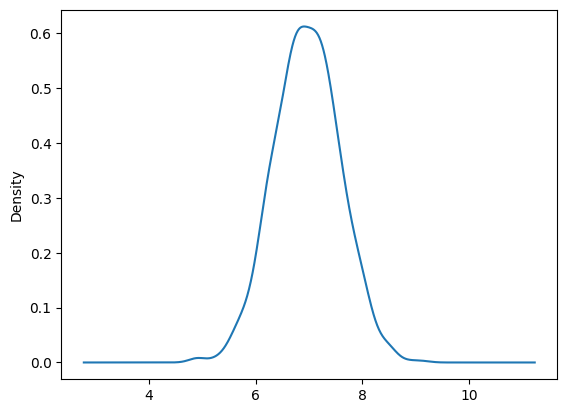

In [148]:
pc["cgpa"].plot(kind="kde")

In [149]:
pc.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [150]:
# Finding Boundary values
print("Highest allow", pc["cgpa"].mean()+3*pc["cgpa"].std())
print("Lowest allowed" ,pc["cgpa"].mean()-3*pc["cgpa"].std())

Highest allow 8.808933625397168
Lowest allowed 5.113546374602832


In [151]:

# outlier
pc[(pc["cgpa"]>8.80) | (pc["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [152]:
# trimming
new_pc=pc[(pc["cgpa"]<8.80) & (pc["cgpa"]>5.11)]
new_pc

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [153]:
# capping
upper_limit=pc["cgpa"].mean()+3*pc["cgpa"].std()
lower_limit=pc["cgpa"].mean()-3*pc["cgpa"].std()

In [154]:
pc["cgpa"]=np.where(
    pc["cgpa"]>upper_limit,
    upper_limit,
    np.where(
        pc["cgpa"]<lower_limit,
        lower_limit,
        pc["cgpa"]
    )
)

In [155]:
pc.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


## IQR
when data is skewed
what is boxplot
and iqr



<Axes: ylabel='Density'>

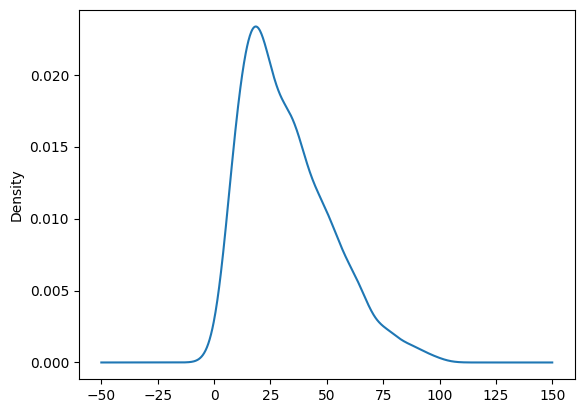

In [156]:
pc=pd.read_csv("data/placement.csv")
pc["placement_exam_marks"].plot(kind="kde")

<Axes: >

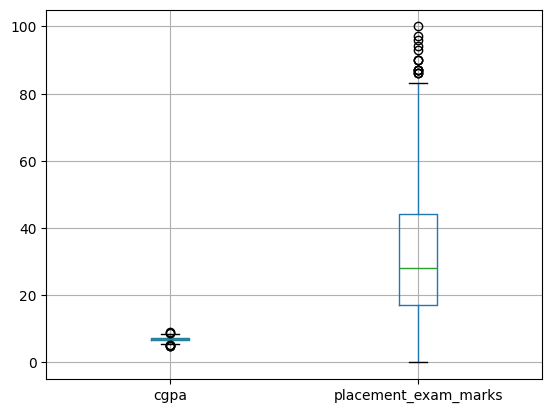

In [157]:
pc[["cgpa", "placement_exam_marks"]].boxplot()

In [158]:
Q_1=pc["placement_exam_marks"].quantile(0.25)
Q_3=pc["placement_exam_marks"].quantile(0.75)
IQR=Q_3-Q_1

In [159]:
max=Q_3+1.5*IQR
min=Q_1-1.5*IQR


In [160]:
print(f"Q_1:{Q_1}, IQR:{IQR}, Q_3:{Q_3}, min:{min}, max:{max}")

Q_1:17.0, IQR:27.0, Q_3:44.0, min:-23.5, max:84.5


In [161]:
pc[pc["placement_exam_marks"]>max]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [162]:
# Trimming
new_pc=pc[pc["placement_exam_marks"]<max]

<Axes: >

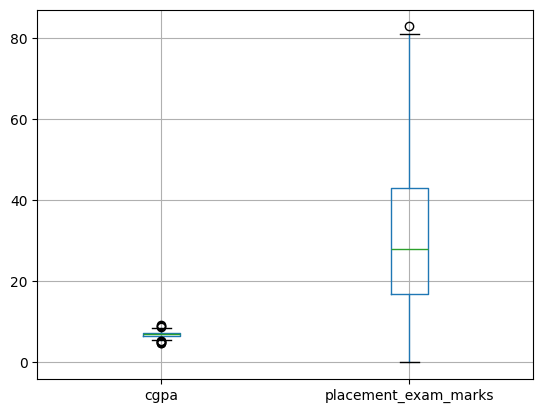

In [163]:
new_pc[["cgpa", "placement_exam_marks"]].boxplot()

In [164]:
# Capping
pc["placement_exam_marks"]=np.where(
    pc["placement_exam_marks"]>max,
    max,
    np.where(
        pc["placement_exam_marks"]<min,
        min,
        pc["placement_exam_marks"]
    )
)

<Axes: >

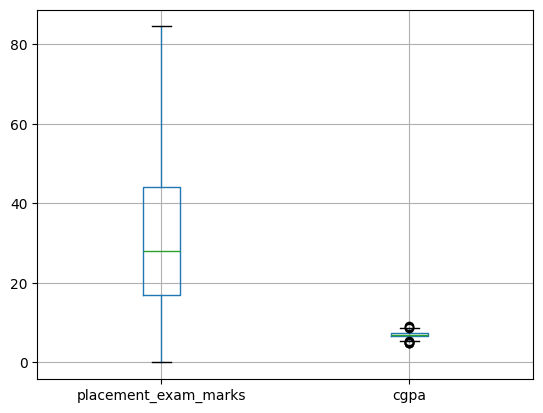

In [165]:
pc[["placement_exam_marks", "cgpa"]].boxplot()

![img](boxplot.png)

## 7. Data Normalization & Scaling (Feature Scaling)
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
- Standardization (StandardScaler)
- MinMax Scaling
- Robust Scaling (for outliers)


## Standardization
Z-score normalization: ,mean=0, standard deviation=1


In [166]:
sp=pd.read_csv("data/50_Startups.csv")
sp.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
9,123334.88,108679.17,304981.62,California,149759.96
17,94657.16,145077.58,282574.31,New York,125370.37
34,46426.07,157693.92,210797.67,California,96712.80
14,119943.24,156547.42,256512.92,Florida,132602.65
0,165349.20,136897.80,471784.10,New York,192261.83
42,23640.93,96189.63,148001.11,California,71498.49
7,130298.13,145530.06,323876.68,Florida,155752.60
19,86419.70,153514.11,0.00,New York,122776.86
41,27892.92,84710.77,164470.71,Florida,77798.83
30,61994.48,115641.28,91131.24,Florida,99937.59


In [167]:
sp_copy=sp.drop("State", axis=1).copy()

In [168]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(sp_copy)

sp_scaled=scaler.transform(sp_copy)

sp_df=pd.DataFrame(sp_scaled, columns=sp_copy.columns)


In [169]:
sp_df.sample()

,R&D Spend,Administration,Marketing Spend,Profit
47,-1.622362,0.507722,-1.743127,-1.740627


In [170]:
np.round(sp_df.describe(), 1)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.0,50.0,50.0,50.0
mean,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.6,-2.5,-1.7,-2.4
25%,-0.7,-0.6,-0.7,-0.5
50%,-0.0,0.0,0.0,-0.1
75%,0.6,0.8,0.7,0.7
max,2.0,2.2,2.2,2.0


Text(0.5, 1.0, 'After scaling')

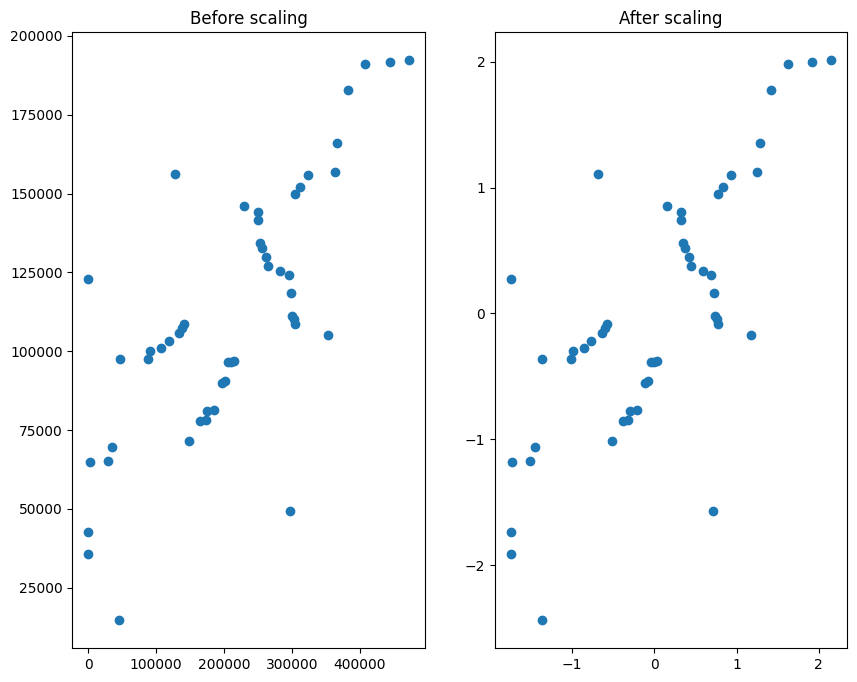

In [171]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(sp["Marketing Spend"], sp["Profit"])
plt.title("Before scaling")
plt.subplot(122)
plt.scatter(sp_df["Marketing Spend"], sp_df["Profit"])
plt.title("After scaling")

<Axes: ylabel='Density'>

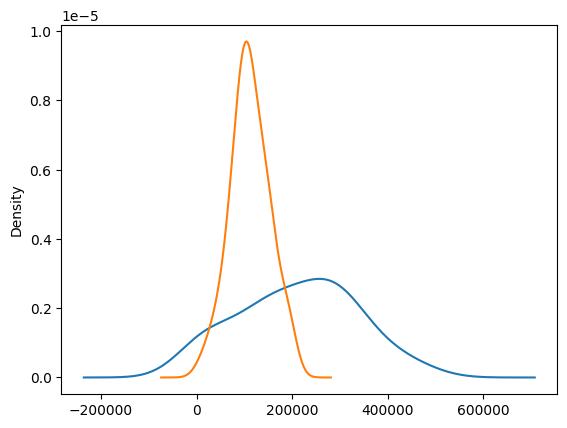

In [172]:
sp["Marketing Spend"].plot(kind="kde", label="Market spend")
sp["Profit"].plot(kind="kde", label="Profit")

<Axes: ylabel='Density'>

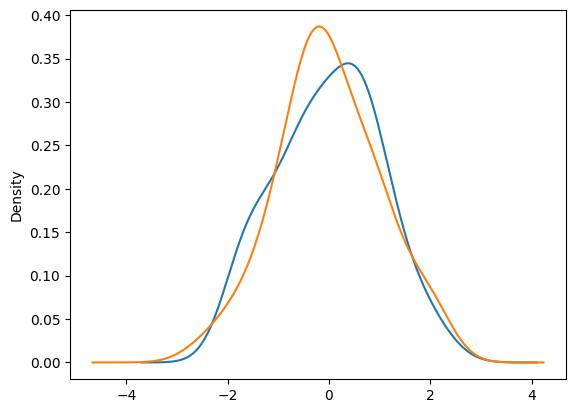

In [173]:
sp_df["Marketing Spend"].plot(kind="kde", label="Market spend")
sp_df["Profit"].plot(kind="kde", label="Profit")

### Why Scaling is important?

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(sp.drop(["Profit","State"], axis=1), sp["Profit"], test_size=0.2)

In [175]:
x_train.shape, x_test.shape

((40, 3), (10, 3))

In [176]:
x_train.head()

,R&D Spend,Administration,Marketing Spend
7,130298.13,145530.06,323876.68
3,144372.41,118671.85,383199.62
32,63408.86,129219.61,46085.25
22,73994.56,122782.75,303319.26
21,78389.47,153773.43,299737.29


In [177]:
scale=StandardScaler()
scale.fit(x_train)

x_train_scaled= pd.DataFrame(scale.transform(x_train), columns=x_train.columns)
x_test_scaled=pd.DataFrame(scale.transform(x_test), columns=x_test.columns)

In [178]:
lr=LinearRegression()
lr_scaled=LinearRegression()

In [179]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [180]:
print("Actual:", mean_squared_error(y_test, y_pred))
print("Scaled:", mean_squared_error(y_test, y_pred_scaled))

Actual: 77556099.17454885
Scaled: 77556099.17454872


in which algorithm to use standarization

## Normalization 
Normalization is a technique often applied as part of data preparation for machine learning. THe goal of normalization is to change the values of numeric columns in the data to use a common scale, without distorting differences in the range of values or losing information.

- MinMax Scaling[0-1]
- Mean Normalization
- Max Absolute
- Robust Scaling


In [181]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)  # for reproducibility

data = pd.DataFrame({
    "Height_cm": np.random.normal(loc=170, scale=10, size=100),
    "Weight_kg": np.random.normal(loc=65, scale=12, size=100)
})

data.head()

,Height_cm,Weight_kg
0,174.967142,48.015551
1,168.617357,59.952256
2,176.476885,60.887426
3,185.230299,55.372673
4,167.658466,63.064571


In [182]:
data.describe()

,Height_cm,Weight_kg
count,100.000000,100.000000
mean,168.961535,65.267655
std,9.081684,11.444028
min,143.802549,41.974745
25%,163.990943,55.332074
50%,168.730437,66.009286
75%,174.059521,71.458045
max,188.522782,97.642030


<Axes: ylabel='Density'>

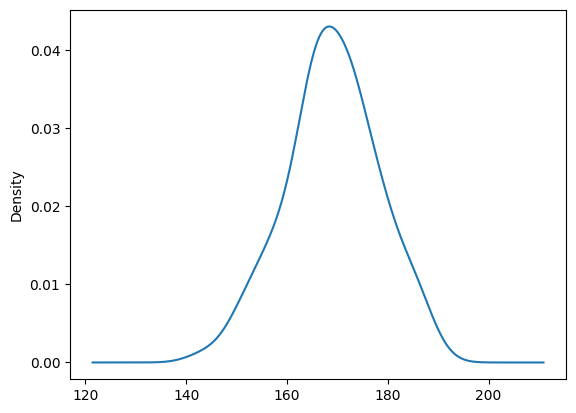

In [183]:
data["Height_cm"].plot(kind="kde")

In [184]:
scalar= MinMaxScaler()

scalar.fit(data)

data_scaled= pd.DataFrame(scalar.transform(data), columns=["Height", "weight"])

Text(0.5, 1.0, 'After scaling')

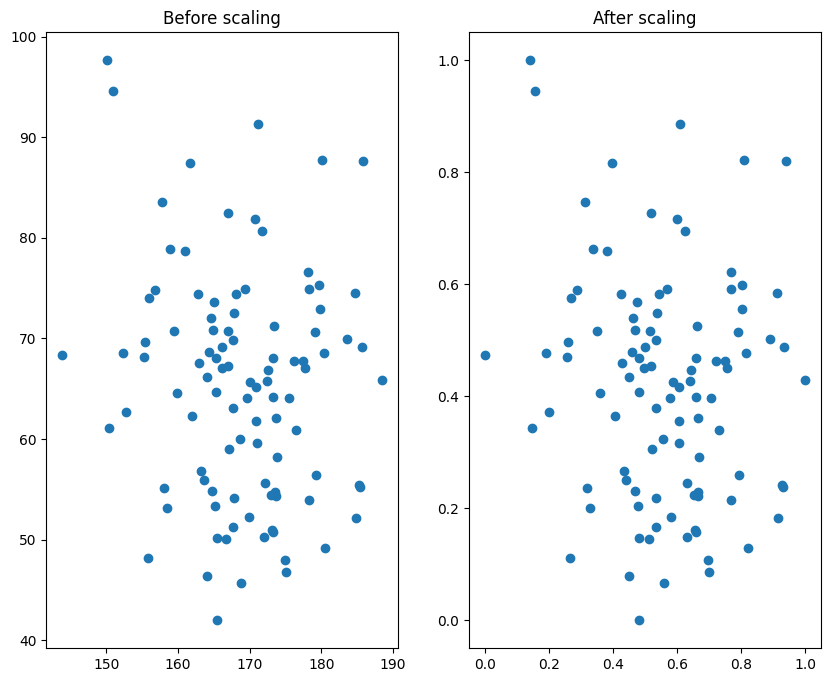

In [185]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(data["Height_cm"], data["Weight_kg"])
plt.title("Before scaling")
plt.subplot(122)
plt.scatter(data_scaled["Height"], data_scaled["weight"])
plt.title("After scaling")

### Mean Normalization


### MaxABS Scaling

### Robust scaling

Normalization VS Standardization
